In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, boxcox

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

import re

#Warning 
import warnings
warnings.filterwarnings('ignore')


# Regression Model 

## Intro:

Hello guys, I will try to explain shortly about linear regression models. As far as there is many documentation of machine learning, here we are going to discuss about supervised model which has two types. linear regression is focused into numerical data and on the other hand, classification is related to categorical data.

Thinking in machine learning, it is to believe how machine learns. As [Autor] mention in his book, Machine learning is a subset of AI. First of all, we have to think how humans learn. There are two types of learning: 1-by logic and 2-by experience.


In [10]:
# Here the link to download the data fron internet

#url = 'https://archive.ics.uci.edu/static/public/9/auto+mpg.zip'
#dataset = wget.download(url)

In [85]:
with open('./dataset/auto+mpg/auto-mpg.names') as f:
    line_clean = [line.strip() for line in f.readlines()]

with open('./dataset/auto+mpg/auto-mpg.data') as f:
    data_clean = f.readlines()

header = [re.search('[^\d][^\s]+',i).group(0)[1:-1] for i in line_clean[33:42]]
header[-1] = 'car name'
header[6] = 'model'

# Raw dataset from auto-mpg.data:

df = pd.read_fwf('./dataset/auto+mpg/auto-mpg.data', names = header)
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Business Analysis

* Goal: 

The main idea is to predict the mpg(miles per galon) from a car model based on features like cylinders, horsepower, aceleration, mode, origin, etc.

* Dataset description:

- mpg: The "mpg" column represents the miles per gallon, indicating how many miles a vehicle can travel on one gallon of fuel. "mpg" is our target variable.
- cylinders: The "cylinders" column denotes the number of cylinders in the engine of the vehicle. It is a multi-valued discrete feature, indicating the count of cylinders, such as 3, 4, 5, 6, 8.
- displacement: The "displacement" column represents the total volume swept by all the cylinders in the engine. It is a continuous value and is typically measured in liters.
- horsepower: The "horsepower" column indicates the power output of the vehicle's engine. It is a continuous value, representing the strength of the engine.
- weight: The "weight" column represents the weight of the vehicle. It is a continuous value, often measured in pounds or kilograms.
- acceleration: The "acceleration" column denotes the time it takes for the vehicle to reach a certain speed. It is a continuous value, indicating the rate of change of velocity.
- model year: The "model year" column represents the year in which the vehicle was manufactured. It is a multi-valued discrete feature, indicating different years of production.
- origin: The "origin" column indicates the geographic origin or manufacturing region of the vehicle. It is a multi-valued discrete feature, representing different countries or regions.
- car model: The "car model" column specifies the unique name of each vehicle instance. It is a string feature, providing a distinct identifier for each car

## References
- https://www.kaggle.com/code/merturper/vehicle-fuel-consumption-eda-stats-ml
- https://www.kaggle.com/code/filizesenkaya/car-eda

# Point 0: How to explore the data?

## Cleaning the data

In [87]:
df.model.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [88]:
df.mpg.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [89]:
df.horsepower.unique()
print("Number of ? is " , len(df[df.horsepower == "?"]))
df.horsepower.replace('?', np.nan, inplace = True)
df.horsepower = df.horsepower.astype(float)
df[df.isnull().any(axis = 1)]

Number of ? is  6


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,"""amc concord dl"""


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


Now we can work with feature "horsepower". We are going to replace "NaN" values by its mean. As can see there is one commom value for this type of value: "Cylinders = 4" and also "Cylinders = 6". So we are goint to replace with its mean:

In [91]:
# As we can see most of the values are related to "ford" car model, we should get the mean of this model:
ford4_mean = df[(df.cylinders == 4) & (df["car name"].str.contains('ford'))]['horsepower'].mean()
ford4_mean = round(ford4_mean, 1)
ford4_mean

81.1

In [92]:
# As we can see most of the values are related to "ford" car model, we should get the mean of this model:
ford6_mean = df[(df.cylinders == 6) & (df["car name"].str.contains('ford'))]['horsepower'].mean()
ford6_mean = round(ford6_mean, 1)
ford6_mean

88.3

In [93]:
# By the way, we get a general mean for  whole "cylinders = 4 and cylinders = 6":
df[(df.cylinders == 4)]['horsepower'].mean(), df[(df.cylinders == 6)]['horsepower'].mean()

(78.28140703517587, 101.50602409638554)

In [94]:
# As we can see, we can use the mean of "ford" car name feature:
df.horsepower.fillna(ford4_mean, inplace = True)
df.horsepower.isnull().sum()

0

In [95]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name


In [96]:
# Now finaly we have clea data. Let's create a more detailed table for our features:

# Create an empty list to store the output data
output_data = []

for col in df.columns:
    
    # If the number of unique values in the column is less than or equal to 5
    if df.loc[:, col].nunique() <= 5:
        # Get the unique values in the column
        unique_values = df.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

output_df

,Column Name,Number of Unique Values,Unique Values,Data Type
0,mpg,129,-,float64
1,cylinders,5,"[8, 4, 6, 3, 5]",int64
2,displacement,82,-,float64
3,horsepower,94,-,float64
4,weight,351,-,float64
5,acceleration,95,-,float64
6,model,13,-,int64
7,origin,3,"[1, 3, 2]",int64
8,car name,305,-,object


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.117085,38.305448,46.0,76.000,92.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


## Exploring the data

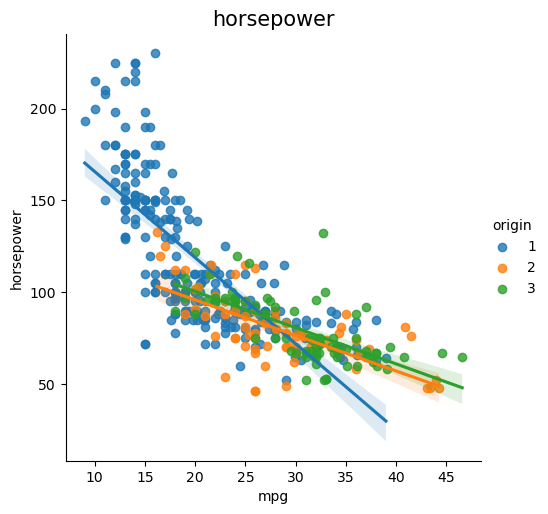

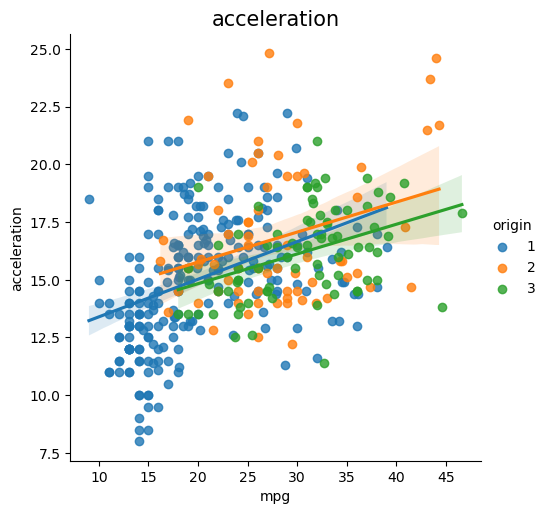

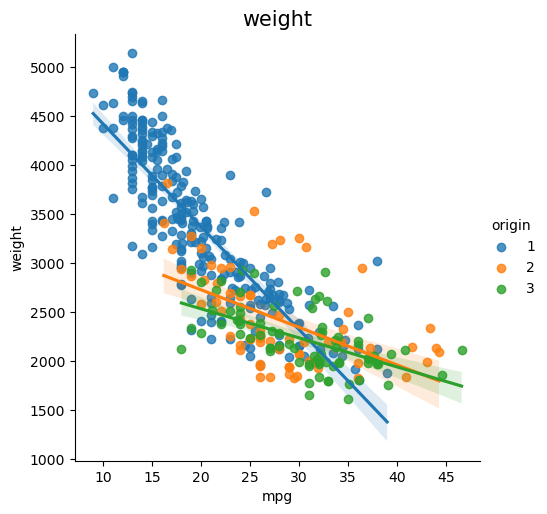

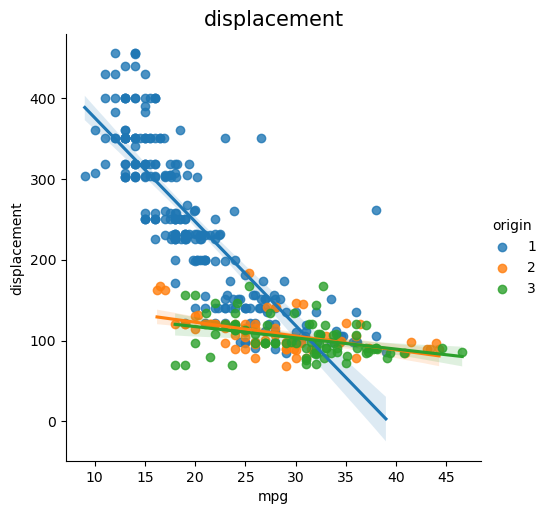

In [98]:
for i in ["horsepower","acceleration","weight","displacement"]:
    plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
    plt.title(i, fontsize = 15)
    plt.show()

### Detecting Outlier

In [99]:
header[1:]

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model',
 'origin',
 'car name']

In [100]:
def detect_outlier(X):
    """
    X: dataframe
    """
    outliers = []
    for i in range(X.shape[1]-1):
        first_q = np.percentile(X[X.columns[i]], 25)
        third_q = np.percentile(X[X.columns[i]], 75) 
        IQR = 1.5*(third_q - first_q)
        minimum = first_q - IQR 
        maximum = third_q + IQR
        
        if(minimum > np.min(X[X.columns[i]]) or maximum < np.max(X[X.columns[i]])):
            outliers.append(X.columns[i])
            print(X.columns[i], "There is Outlier")
    return outliers

In [101]:
outliers = detect_outlier(df)

mpg There is Outlier
horsepower There is Outlier
acceleration There is Outlier


In [102]:
# We don't need to consider "mpg" label:
outliers = detect_outlier(df[header[1:]])

horsepower There is Outlier
acceleration There is Outlier


In [103]:
outliers

['horsepower', 'acceleration']

In [104]:
df.describe(percentiles=[0.01,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
mpg,398.0,23.514573,7.815984,9.0,11.000,17.500,23.0,29.000,43.418,46.6
cylinders,398.0,5.454774,1.701004,3.0,3.970,4.000,4.0,8.000,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,70.970,104.250,148.5,262.000,440.420,455.0
horsepower,398.0,104.117085,38.305448,46.0,48.000,76.000,92.0,125.000,220.150,230.0
weight,398.0,2970.424623,846.841774,1613.0,1772.610,2223.750,2803.5,3608.000,4951.030,5140.0
acceleration,398.0,15.568090,2.757689,8.0,9.485,13.825,15.5,17.175,22.239,24.8
model,398.0,76.010050,3.697627,70.0,70.000,73.000,76.0,79.000,82.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.000,1.0,2.000,3.000,3.0


(array([1, 2]), [Text(1, 0, 'horsepower'), Text(2, 0, 'acceleration')])

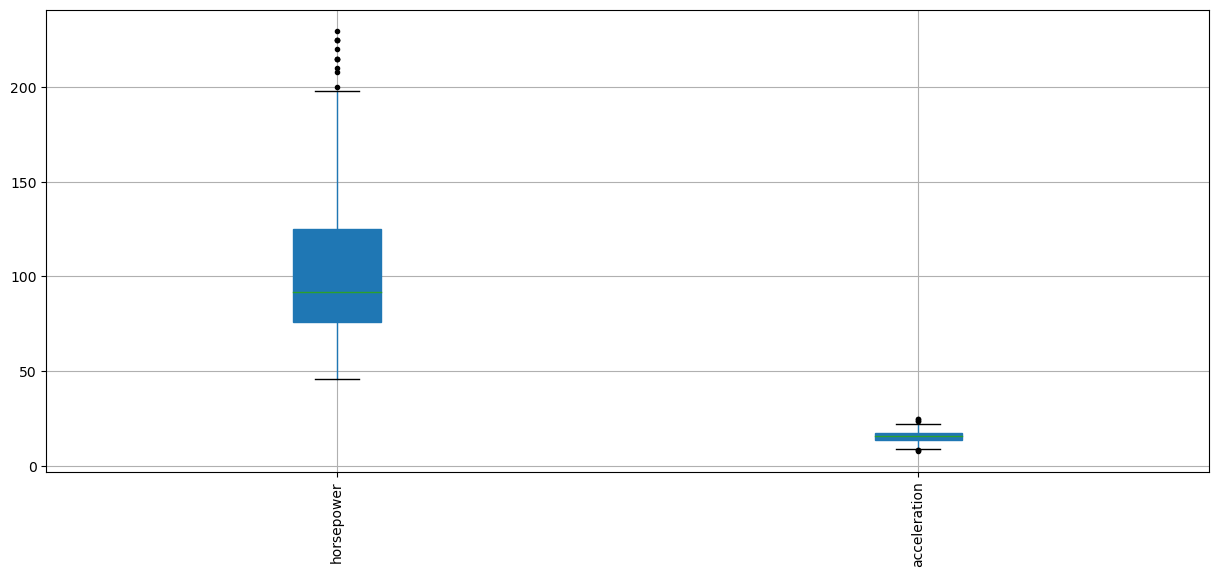

In [105]:
plt.subplots(figsize=(15,6))
df[outliers].boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [106]:
for count, value in enumerate(outliers):
    print(count, value)

0 horsepower
1 acceleration


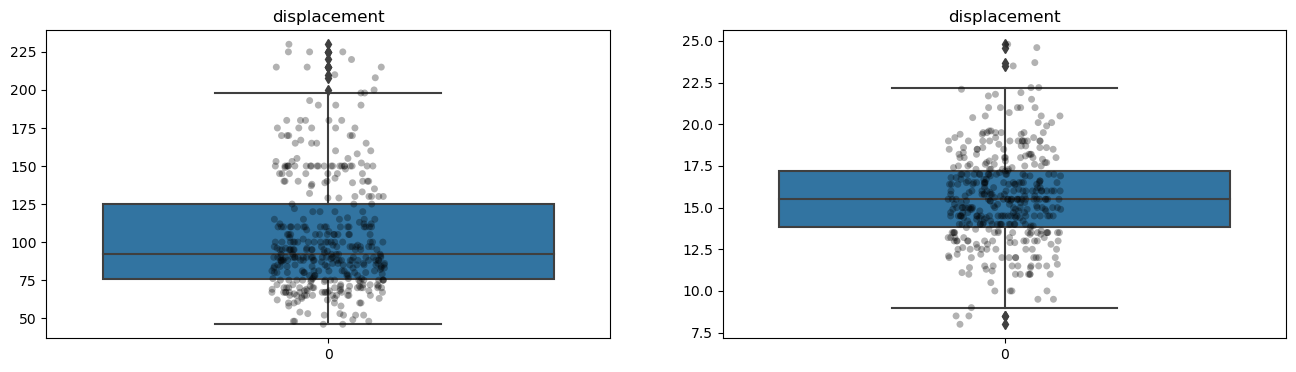

In [107]:
# Checking more details about outliers:
plt.figure(figsize=(16, 4))
for count, feature in enumerate(outliers):
    plt.subplot(1, len(outliers), count+1)
    sns.boxplot(data = df[feature])
    sns.stripplot(color = 'black', alpha = 0.3, data = df[feature])
    plt.title(i)
plt.show()



In [119]:
# Removing outliers
def remove_outlier(df, outliers):
    """
    df: dataframe
    outliers: outliers
    """
    
    print("The outliers are :", outliers)
    
    print("Removing outliers ......")
    for col in outliers:
        first_q = np.percentile(df[col], 25)
        third_q = np.percentile(df[col], 75) 
        #IQR = 1.5*(third_q - first_q)
        IQR = (third_q - first_q)
        minimum = first_q - IQR 
        maximum = third_q + IQR
    
        median = df[col].median()
    
        df.loc[df[col] < minimum, col] = median 
        df.loc[df[col] > maximum, col] = median
    return df

In [120]:
df.shape

(398, 9)

In [121]:
df_new = remove_outlier(df, outliers)

print("Size of the dataset before remove outlier: {}".format(df.shape))
print("Size of the dataset after remove outlier: {}".format(df_new.shape))
df.head(10)

The outliers are : ['horsepower', 'acceleration']
Removing outliers ......
Size of the dataset before remove outlier: (398, 9)
Size of the dataset after remove outlier: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,92.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,15.5,70,1,"""ford torino"""
5,15.0,8,429.0,92.0,4341.0,15.5,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,92.0,4354.0,15.5,70,1,"""chevrolet impala"""
7,14.0,8,440.0,92.0,4312.0,15.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,92.0,4425.0,15.5,70,1,"""pontiac catalina"""
9,15.0,8,390.0,92.0,3850.0,15.5,70,1,"""amc ambassador dpl"""


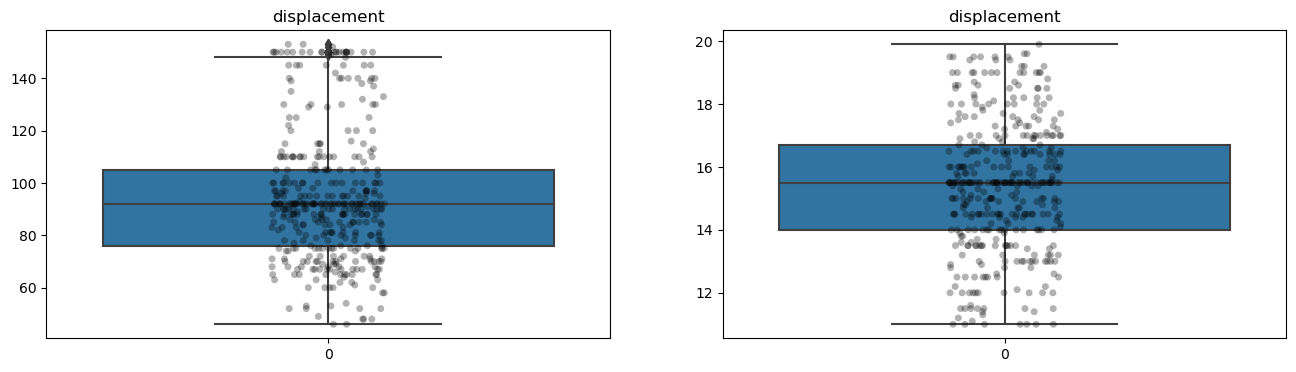

In [122]:
# Checking more details about outliers:
plt.figure(figsize=(16, 4))
for count, feature in enumerate(outliers):
    plt.subplot(1, len(outliers), count+1)
    sns.boxplot(data = df_new[feature])
    sns.stripplot(color = 'black', alpha = 0.3, data = df_new[feature])
    plt.title(i)
plt.show()

# Point 1: How to define the model? Which model to use based on data?

Analysing the type of data of "mpg" label, we can see that this a numerical data which can be float. So the output of our model has to be a number. In this way, we have to do a regression model. What kind of regression models, it depends on the purpose of label.

Regression types:
1.
2.
3.
...

In this case, we are going to use linear regression. A linear regression model can be represented as a linear combination of features to represent a label. It is like a line with an slope ans intercep(bias).

$$y = a*x + b$$

In general, we can consider an hiperplane of n dimensions:

$$Y_{pred} = a_1*x_1 + a_2*x_2 + ... + a_n*X_n + b_0$$

Where:

- The $a_i$ are the weights
- The $x_i$ are the features
- The $b_0$ is the bias.

In matriz format:

Y = A dot X

About the weigths, there are 2 concepts:

- Slope is the measue of how steep is the data distributed on the plane.
- Intercept(Bias) is like a default value of the label when there is no data. The default level of toxity.


# Point 2: How to define the weights? Which algorithm to use?

A linear regression is a line which wants to fit in the best way all points. In this way, we need to set up an algorithm to find the weigths. There are many ways to set up this procedure, but here is the general way:

A basic algorithm:

- Input: points, a dataset of points
- Output: a line which passes close to the data,  a model which best fit the data
- Procedure:
    1. pick a model with random weigth and bias
    2. repeat many times: Adjust the weigths and bias to improve predictions
    3. return a model
    
At first look, we can said the weights are between [0.5, 1] and the bias between [3, 9]


# Point 3: How to measure/evaluate if our algorithm is the best? How to get the best weigths?

To measure we need to know the diference about real value and predicted value

MAE
MSE
RMSE

# Point 4: How to optimize the algorithm?


# Point 5: How to use the model?